##Load Pickled data file and print the head of the dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import gdown

pklurl = 'https://drive.google.com/uc?id=1c4HPXijPPFH_Vt7x4z40HEtXS5Efd8S1'

gdown.download(pklurl, 'data.pkl', quiet=False)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data.pkl')
print(df.shape)
# print(df.columns)
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1c4HPXijPPFH_Vt7x4z40HEtXS5Efd8S1
From (redirected): https://drive.google.com/uc?id=1c4HPXijPPFH_Vt7x4z40HEtXS5Efd8S1&confirm=t&uuid=af87bea8-438c-4d37-9a37-ffb95470be44
To: /content/data.pkl
100%|██████████| 268M/268M [00:03<00:00, 71.9MB/s]


(449958, 80)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,IS_WORKDAY,IS_HOLIDAY,IS_HOLIDAY_LEAVE,A_DATE,DAY_FULL,DAY_FULL_CAPITAL_CASE,DAY_FULL_LOWER_CASE,DAY_ABBREV,IS_WEEKDAY,IS_WEEKDAY_BY_REGEX,DAY_OF_WEEK,DAY_OF_MONTH,DAY_OF_YEAR,WEEK_OF_MONTH,MONTH_FULL,MONTH_ABBREV,MONTH_NUMBER,QUARTER,YEAR_SHORT,YEAR_FULL,FISCAL_QUARTER,FISCAL_YEAR,FISCAL_YEAR_FULL,TOMORROW,ONE_WEEK_LATER,ONE_MONTH_LATER,THREE_MONTHS_LATER,ONE_YEAR_LATER,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,PSUN,SNOW,TAVG,TOBS,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT10,WT11
0,13211146,JG424812,2021-01-01,035XX W DIVERSEY AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1412,14,35.0,21,11,NaN,NaN,2021,09/15/2023 03:42:23 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,2021-01-01,FRIDAY,Friday,friday,FRI,1,1,6,1,1,1,January,Jan,1,1,21,2021,2,21,2021,1/8/2021,1/8/2021,2/1/2021,4/1/2021,1/1/2022,USC00115097,"LISLE MORTON ARBORETUM, IL US",41.81271,-88.07275,206.3,2021-01-01,NaN,0.0,NaN,0.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13204236,JG416567,2021-01-01,0000X E 61ST ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,311,3,20.0,40,02,NaN,NaN,2021,09/16/2023 03:42:58 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,2021-01-01,FRIDAY,Friday,friday,FRI,1,1,6,1,1,1,January,Jan,1,1,21,2021,2,21,2021,1/8/2021,1/8/2021,2/1/2021,4/1/2021,1/1/2022,USC00115097,"LISLE MORTON ARBORETUM, IL US",41.81271,-88.07275,206.3,2021-01-01,NaN,0.0,NaN,0.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13218115,JG431987,2021-01-01,052XX W MONROE ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,1522,15,29.0,25,02,NaN,NaN,2021,09/22/2023 03:42:13 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,2021-01-01,FRIDAY,Friday,friday,FRI,1,1,6,1,1,1,January,Jan,1,1,21,2021,2,21,2021,1/8/2021,1/8/2021,2/1/2021,4/1/2021,1/1/2022,USC00115097,"LISLE MORTON ARBORETUM, IL US",41.81271,-88.07275,206.3,2021-01-01,NaN,0.0,NaN,0.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12366492,JE231493,2021-01-01,014XX N KOLIN AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,2534,25,26.0,23,26,1147113.0,1909224.0,2021,05/18/2021 03:40:06 PM,41.906877,-87.735033,"(41.906877429, -87.735032531)",4.0,4299.0,24.0,286.0,49.0,5.0,6.0,194.0,0,1.0,1.0,2021-01-01,FRIDAY,Friday,friday,FRI,1,1,6,1,1,1,January,Jan,1,1,21,2021,2,21,2021,1/8/2021,1/8/2021,2/1/2021,4/1/2021,1/1/2022,USC00115097,"LISLE MORTON ARBORETUM, IL US",41.81271,-88.07275,206.3,2021-01-01,NaN,0.0,NaN,0.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12416112,JE292434,2021-01-01,002XX W HURON ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1831,18,42.0,8,02,1174402.0,1905022.0,2021,07/08/2021 03:40:17 PM,41.894781,-87.634915,"(41.894780865, -87.634914779)",22.0,4446.0,37.0,652.0,36.0,55.0,14.0,73.0,0,1.0,1.0,2021-01-01,FRIDAY,Friday,friday,FRI,1,1,6,1,1,1,January,Jan,1,1,21,2021,2,21,2021,1/8/2021,1/8/2021,2/1/2021,4/1/2021,1/1/2022,USC00115097,"LISLE MORTON ARBORETUM, IL US",41.81271,-88.07275,206.3,2021-01-01,NaN,0.0,NaN,0.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###In order to identify missing or sparse data, lets examine the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449958 entries, 0 to 449957
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID                          449958 non-null  int64         
 1   Case Number                 449958 non-null  object        
 2   Date                        449958 non-null  datetime64[ns]
 3   Block                       449958 non-null  object        
 4   IUCR                        449958 non-null  object        
 5   Primary Type                449958 non-null  object        
 6   Description                 449958 non-null  object        
 7   Location Description        447739 non-null  object        
 8   Arrest                      449958 non-null  bool          
 9   Domestic                    449958 non-null  bool          
 10  Beat                        449958 non-null  int64         
 11  District                    449958 non-

##Looking at the data we can see that there are a lot of columns that dont have any non-null values, we should get rid of them, in the following code block we'll drop those columns

In [ ]:
df.dropna(axis=1, how='all', inplace=True)

##There are some columns which represent repetitive data, lets get rid of those

In [ ]:
df = df.drop(columns=['DAY_FULL_CAPITAL_CASE', 'DAY_FULL_LOWER_CASE', 'DAY_ABBREV',
                      'IS_WEEKDAY_BY_REGEX', 'MONTH_ABBREV',
                      'YEAR_SHORT', 'FISCAL_QUARTER', 'FISCAL_YEAR',
                      'TOMORROW', 'ONE_WEEK_LATER', 'ONE_MONTH_LATER',
                      'THREE_MONTHS_LATER', 'ONE_YEAR_LATER', 'STATION', 'NAME', 'LATITUDE',
                      'LONGITUDE', 'ELEVATION', 'A_DATE','DATE'])

##**Check if the dataset is sparse**

In [ ]:
df.isna().sum()[df.isna().sum()!=0]

,0
Location Description,2219
Ward,21
X Coordinate,11190
Y Coordinate,11190
Latitude,11190
Longitude,11190
Location,11190
Historical Wards 2003-2015,12754
Zip Codes,11190
Community Areas,12541


### **Observing the Class Distribution for the target label**

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Beat'}>,
        <Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'Ward'}>,
        <Axes: title={'center': 'Community Area'}>],
       [<Axes: title={'center': 'X Coordinate'}>,
        <Axes: title={'center': 'Y Coordinate'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Historical Wards 2003-2015'}>],
       [<Axes: title={'center': 'Zip Codes'}>,
        <Axes: title={'center': 'Community Areas'}>,
        <Axes: title={'center': 'Census Tracts'}>,
        <Axes: title={'center': 'Wards'}>,
        <Axes: title={'center': 'Boundaries - ZIP Codes'}>,
        <Axes: title={'center': 'Police Districts'}>],
       [<Axes: title={'center': 'Police Beats'}>,
        <Axes: title={'center': 'IS_WORKDAY'}>,
        <Axes: title={'center': 'IS_

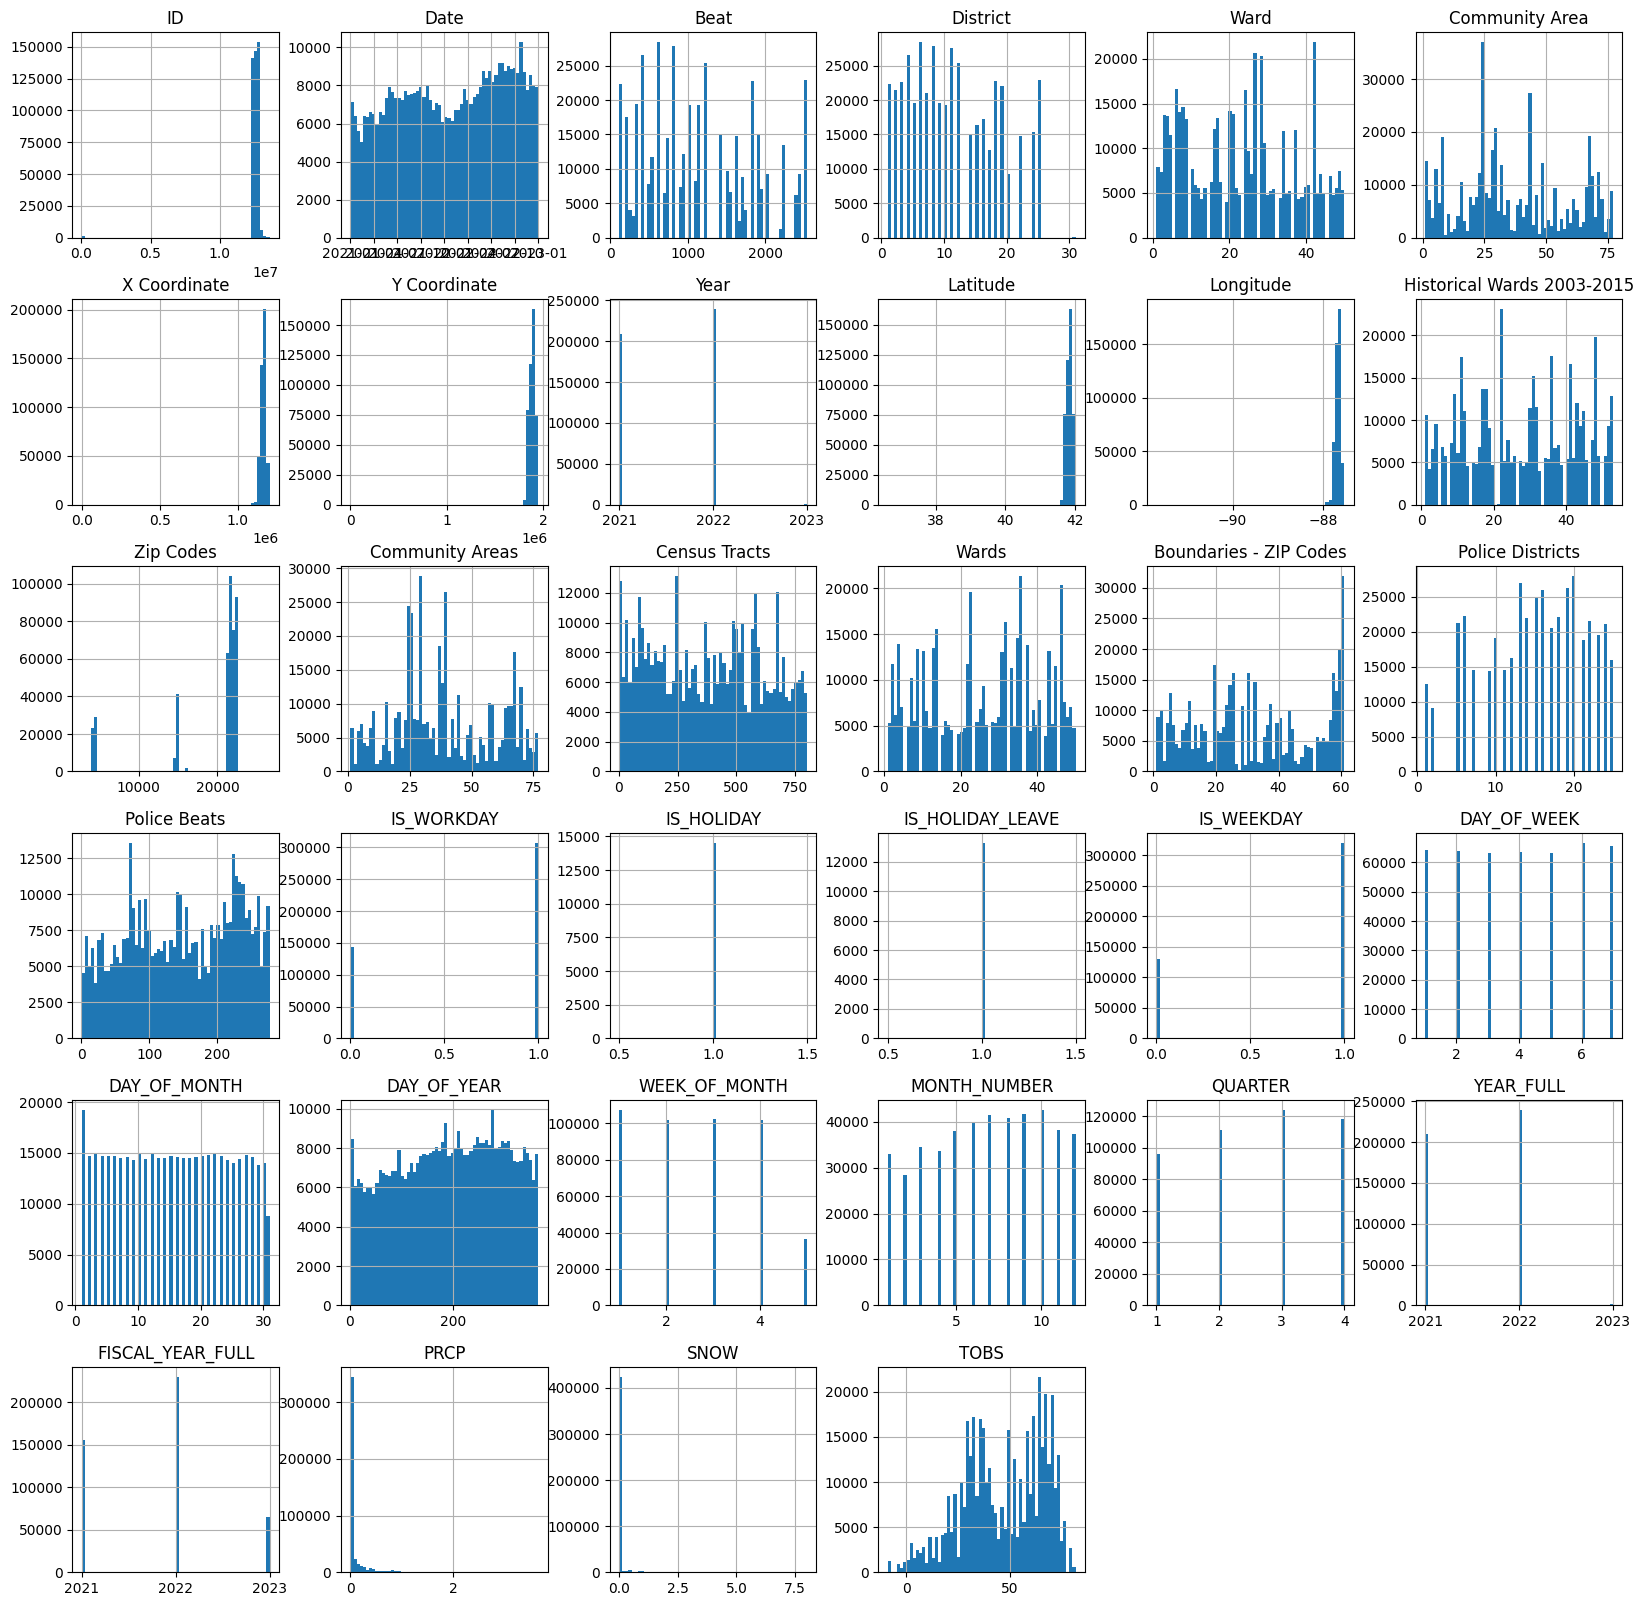

In [ ]:
df.hist(bins=60, figsize=(20,20))

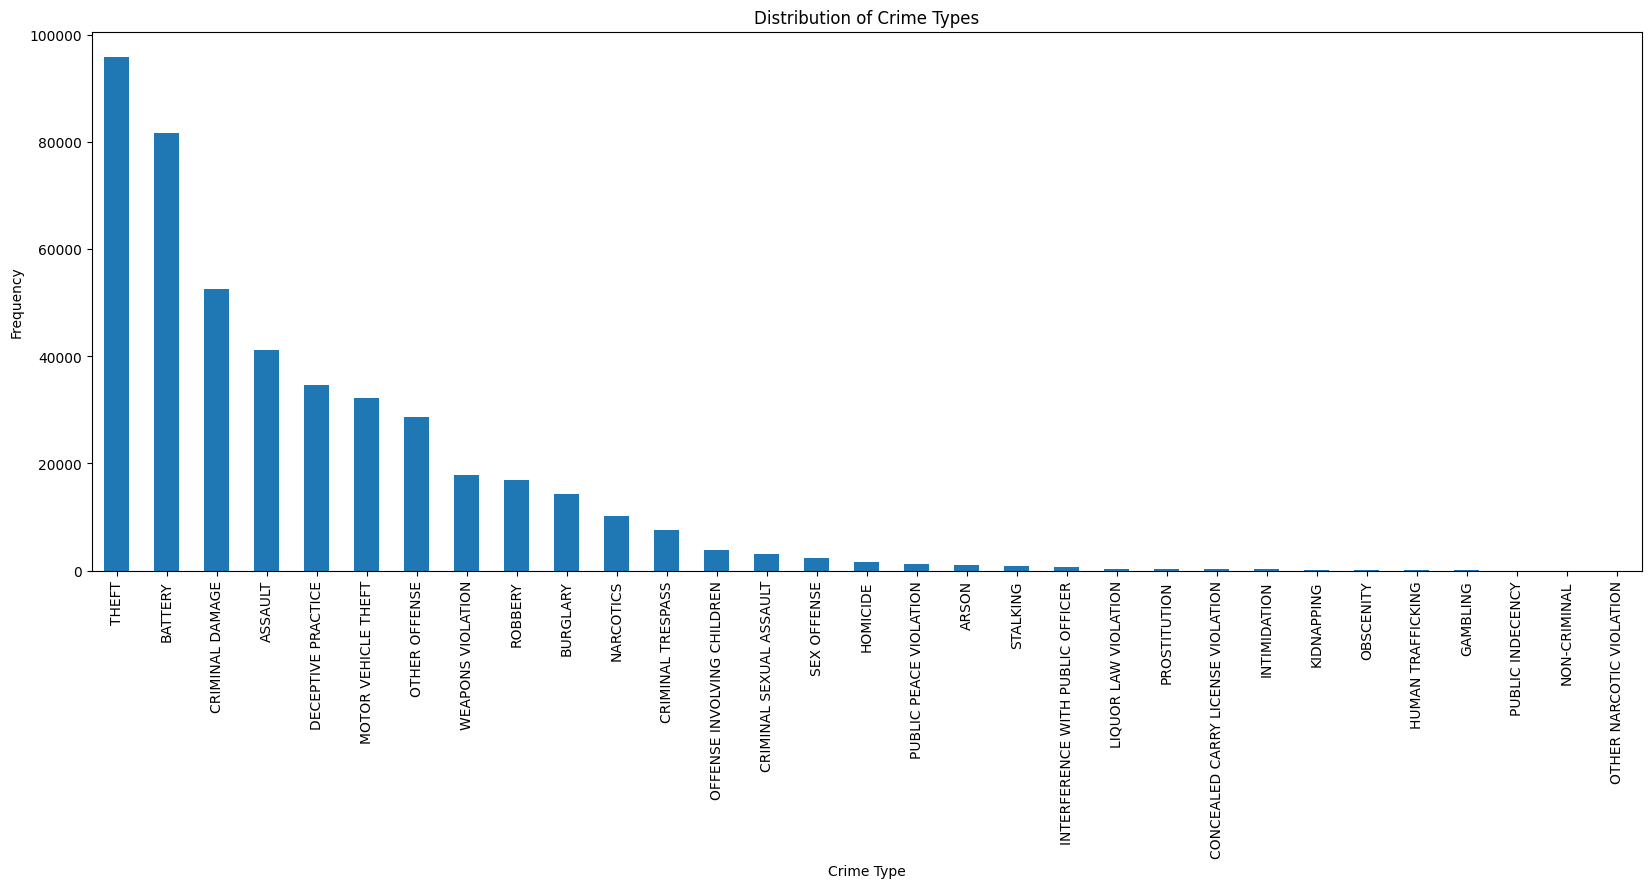

In [ ]:
df['Primary Type'].value_counts().plot(kind='bar', figsize=(20, 7))
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.show()

As we can see in the plot above, the dataset exhibits significant class imbalance, with a few classes such as **THEFT**, **BATTERY**, and **CRIMINAL DAMAGE** dominating the majority of the data, while rare crime types like **Public Indecency**, **Human Trafficking**, and **Gambling** have very few instances. This imbalance might lead to biased model predictions, where the model may perform well on the majority classes but fail to accurately identify rare events.

We should apply appropriate evaluation metrics to ensure that minority classes are adequately represented and predicted.

We also see that certain community areas have significantly higher counts of crimes. We should look into the characteristics of the crimes happening in these community areas. Perhaps the community area will prove to be one of the more important features when trying to predict crime.

**Distribution of Crimes by Month: Analysis of Crime Frequency and Monthly Trends**


Number of NaN entries in the MONTH_FULL column =  0
MONTH_FULL
January      33006
February     28400
March        34595
April        33711
May          38039
June         39698
July         41608
August       40961
September    41659
October      42650
November     38306
December     37325
Name: count, dtype: int64


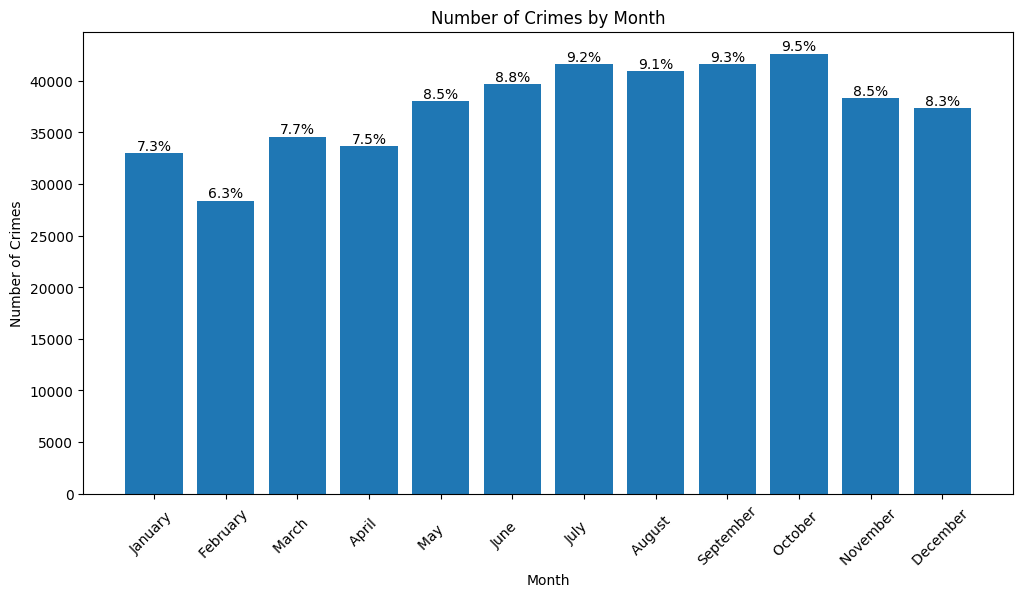

In [ ]:
# Plot a bar chart to reveal if certain months are high in crime
# Check for nans in the month column
print('Number of NaN entries in the MONTH_FULL column = ', pd.isna(df.MONTH_FULL).sum())
df.MONTH_FULL.replace(" ","")
# Aggregate number of entries for each month
crime_counts_by_month = df['MONTH_FULL'].value_counts()

# Define the order of the months
month_order = [ "January  ", "February ", "March    ", "April    ", "May      ", "June     ",
    "July     ", "August   ", "September", "October  ", "November ", "December "]

crime_counts_by_month = crime_counts_by_month.reindex(month_order)
print(crime_counts_by_month)

# Calculate what percentage of crimes occured in each month
total_crimes = crime_counts_by_month.sum()
month_percentages = (crime_counts_by_month / total_crimes) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(crime_counts_by_month.index, crime_counts_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Month')
plt.xticks(rotation=45)\

# Display the percentage on top of each bar
for bar, percentage in zip(bars, month_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1,  # Position the text
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()


Examining the above bar chart, we see that the largest number of crimes are commited between May and November, with particular spikes between July and October. February appears to be the safest month, no doubt in part due to it also being the shortest month.

### After cleaning the data, pickle the cleaned version

In [ ]:
df.to_pickle('cleaned_merged_crime_holiday_weather.pkl')